In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

# Part 1: Data Cleaning

## Clean Player Data

In [2]:
p_feature = pd.read_csv('player_attributes.csv')

In [3]:
p_feature.describe()

,player_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<span style="font-family:Times; font-size:1.3em;">

It will be optimal if we factor in each player's condition at different time period. However, for the sake of simplicity, we hypothesize that an individual player's attributes do not vary accross different timeframe. Therefore, We shall only keep the most recent record for each player.
    
<span>

In [4]:
p_feature.sort_values('date', ascending = False)
p_feature = p_feature.groupby('player_id', sort = False, as_index = False).first()

use average

In [5]:
p_feature

,player_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2/18/16 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,155782,4/21/16 0:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,162549,1/7/16 0:00,65.0,67.0,right,medium,medium,64.0,58.0,60.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,30572,4/21/16 0:00,69.0,69.0,right,medium,medium,57.0,21.0,68.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,23780,12/24/15 0:00,70.0,70.0,right,medium,medium,46.0,34.0,73.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,26357,3/6/15 0:00,73.0,73.0,right,low,medium,42.0,27.0,74.0,...,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0
11056,111182,9/18/14 0:00,63.0,67.0,left,high,medium,65.0,44.0,59.0,...,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0
11057,36491,2/22/11 0:00,68.0,73.0,left,NaN,_0,64.0,38.0,71.0,...,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
11058,35506,2/22/11 0:00,67.0,78.0,right,NaN,_0,48.0,43.0,79.0,...,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0


In [6]:
p_feature = p_feature.drop(columns = ['date'])

In [7]:
p_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            11060 non-null  int64  
 1   overall_rating       11060 non-null  float64
 2   potential            11060 non-null  float64
 3   preferred_foot       11060 non-null  object 
 4   attacking_work_rate  10520 non-null  object 
 5   defensive_work_rate  11060 non-null  object 
 6   crossing             11060 non-null  float64
 7   finishing            11060 non-null  float64
 8   heading_accuracy     11060 non-null  float64
 9   short_passing        11060 non-null  float64
 10  volleys              10582 non-null  float64
 11  dribbling            11060 non-null  float64
 12  curve                10582 non-null  float64
 13  free_kick_accuracy   11060 non-null  float64
 14  long_passing         11060 non-null  float64
 15  ball_control         11060 non-null 

<span style="font-family:Times; font-size:1.3em;">

The missing data are clearly not missing completely at random (MCAR), since the missing data is clearly systematically lost. The same rows are missing for different features. In this case, it is not safe to drop the rows with missing data since by doing so we are amplifying bias. 
    
However, it is also not appropriate to perform multiple imputation since there is a large chance that values are not missing at random (MAR). Therefore we will impute the mean for numerical features.

<span>

In [8]:
p_feature_num = p_feature.drop(columns = ['player_id','preferred_foot', 'attacking_work_rate',\
                                          'defensive_work_rate'], inplace=False)
p_feature_cat = p_feature[['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']]

In [9]:
p_feature_num.std()

overall_rating         6.316694
potential              6.214862
crossing              17.466495
finishing             18.959237
heading_accuracy      16.709716
short_passing         13.814418
volleys               18.013271
dribbling             17.749173
curve                 18.316738
free_kick_accuracy    17.857927
long_passing          14.361713
ball_control          15.309941
acceleration          14.044542
sprint_speed          13.750589
agility               13.799563
reactions              8.352012
balance               13.544272
shot_power            16.426297
jumping               11.403024
stamina               14.264361
strength              11.579763
long_shots            18.434441
aggression            16.254977
interceptions         19.898426
positioning           19.041354
vision                14.551139
penalties             15.890658
marking               21.598650
standing_tackle       21.721379
sliding_tackle        21.728770
gk_diving             17.052335
gk_handl

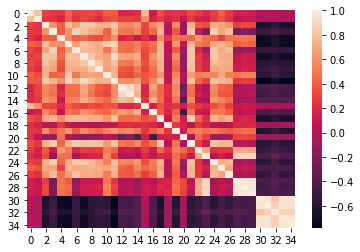

In [10]:
sn.heatmap(p_feature_num.corr().values)

<span style="font-family:Times; font-size:1.3em;">

We can combine the gk_ features into one.
    
<span>

In [11]:
# impute numerical features with mean.
p_feature_num = p_feature_num.fillna(p_feature_num.mean())
p_feature_num_norm = (p_feature_num - p_feature_num.mean()) / p_feature_num.std()

In [12]:
p_feature_num_norm['mean_tackle'] = p_feature_num_norm[['marking',\
                                                        'standing_tackle','sliding_tackle']].mean(axis = 1)
p_feature_num_norm = p_feature_num_norm.drop(columns = ['marking','standing_tackle','sliding_tackle'])
p_feature_num_norm['mean_gk'] = p_feature_num_norm[['gk_diving','gk_diving','gk_kicking',\
                                                        'gk_positioning','gk_reflexes','gk_handling']].mean(axis = 1)
p_feature_num_norm = p_feature_num_norm.drop(columns = ['gk_diving','gk_diving','gk_kicking',\
                                                        'gk_positioning','gk_reflexes','gk_handling'])

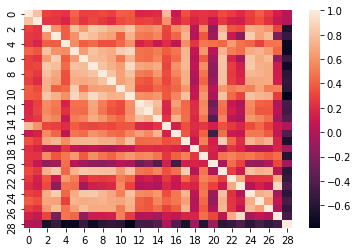

In [13]:
sn.heatmap(p_feature_num_norm.corr().values)

In [14]:
final_data = p_feature_num_norm

In [15]:
final_data.to_csv("talent_cleaned.csv")

## Player Data Feature Selection

In [16]:
from sklearn.linear_model import Lasso

In [17]:
final_data = final_data.drop(columns = ['potential'])

In [18]:
selector = Lasso(alpha = 0.1)
y = final_data['overall_rating'].values
X = final_data.iloc[:,1:].values
selector.fit(X,y)

Lasso(alpha=0.1)

In [19]:
selector.coef_

array([ 0.        ,  0.        ,  0.        ,  0.02113504,  0.        ,
        0.        ,  0.        ,  0.        ,  0.04019422,  0.        ,
        0.        ,  0.        ,  0.        ,  0.65167429, -0.        ,
        0.        ,  0.        ,  0.        ,  0.03330338,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [20]:
index = [i for i, e in enumerate(selector.coef_) if e != 0]
coef = [e for i, e in enumerate(selector.coef_) if e != 0]
features = final_data.columns[1:]
features = features[index]
dict(zip(features, coef))

{'short_passing': 0.021135039238333205,
 'long_passing': 0.040194219406397176,
 'reactions': 0.6516742868382128,
 'strength': 0.03330338406225064}

## Modeling

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [25]:
match = pd.read_csv('match_clean4.csv')

In [26]:
match

,Unnamed: 0,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,...,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet
0,1,1,1,2008/2009,1,08/08/16,492474,10000,9994,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1.898889,3.250000,3.616667
1,2,1,1,2008/2009,1,08/08/16,492475,9984,8635,0,...,0.0,0.0,0.0,0.0,0.0,0,0,2.462222,3.233333,2.544444
2,4,1,1,2008/2009,1,08/08/16,492477,7947,9985,1,...,0.0,0.0,0.0,0.0,0.0,0,0,4.494444,3.422222,1.674444
3,6,1,1,2008/2009,1,08/08/16,492479,9999,8571,2,...,0.0,0.0,0.0,0.0,0.0,0,0,1.957778,3.266667,3.400000
4,7,1,1,2008/2009,1,08/08/16,492480,4049,9996,1,...,0.0,0.0,0.0,0.0,0.0,0,0,2.714444,3.272222,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22592,24479,21518,21518,2015/2016,37,16/05/8,2030520,10205,9783,0,...,40668.0,151079.0,279173.0,194660.0,198566.0,11,-18,2.410000,3.188571,3.027143
22593,24478,21518,21518,2015/2016,37,16/05/8,2030519,8633,10267,3,...,361757.0,75307.0,40148.0,193869.0,241825.0,75,-1,1.207143,7.171429,11.642857
22594,24477,21518,21518,2015/2016,37,16/05/8,2030518,8560,8370,2,...,75004.0,482331.0,2802.0,210065.0,150770.0,-4,-20,3.432857,3.574286,2.074286
22595,24484,21518,21518,2015/2016,37,16/05/8,2030525,8306,8315,0,...,45749.0,604105.0,33871.0,179772.0,33028.0,-8,13,3.910000,3.585714,1.920000


In [27]:
len(match.match_id.unique())

22597

In [28]:
match.columns

Index(['Unnamed: 0', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_id', 'home_team_id', 'away_team_id', 'home_team_goal',
       'away_team_goal', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11', 'home_net_score',
       'away_net_score', 'avg_h_bet', 'avg_d_bet', 'avg_a_bet'],
      dtype='object')

In [29]:
def result(data):
    if data.home_team_goal > data.away_team_goal:
        return 0
    elif data.home_team_goal == data.away_team_goal:
        return 1
    else:
        return 2
match['result'] = match.apply(result, axis=1)
match = match.drop(['country_id', 'league_id', \
                        'season', 'stage', 'date', 'match_id', 'home_team_id', \
                        'away_team_id', 'home_team_goal', 'away_team_goal'], axis=1)

In [30]:
match = match.drop(columns = ['Unnamed: 0'])

In [31]:
match

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_8,away_player_9,away_player_10,away_player_11,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1.898889,3.250000,3.616667,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.462222,3.233333,2.544444,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,4.494444,3.422222,1.674444,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1.957778,3.266667,3.400000,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.714444,3.272222,2.316667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22592,38467.0,183185.0,182921.0,34952.0,79737.0,474672.0,42479.0,268282.0,562062.0,45744.0,...,151079.0,279173.0,194660.0,198566.0,11,-18,2.410000,3.188571,3.027143,2
22593,40672.0,208077.0,230982.0,30962.0,28467.0,164684.0,208494.0,95078.0,359193.0,26166.0,...,75307.0,40148.0,193869.0,241825.0,75,-1,1.207143,7.171429,11.642857,0
22594,245555.0,33960.0,201111.0,47565.0,607148.0,41156.0,678234.0,33973.0,99047.0,205278.0,...,482331.0,2802.0,210065.0,150770.0,-4,-20,3.432857,3.574286,2.074286,0
22595,477498.0,74991.0,291635.0,74989.0,183497.0,213916.0,484906.0,33761.0,243781.0,213729.0,...,604105.0,33871.0,179772.0,33028.0,-8,13,3.910000,3.585714,1.920000,1


### Clean Player ID and Merge player and match tables

In [32]:
match_cleaned = match[(match.home_player_1 != 0)&(match.home_player_2 != 0)&(match.home_player_3 != 0)\
     &(match.home_player_4 != 0)&(match.home_player_5 != 0)&(match.home_player_6 != 0)&(match.home_player_7 != 0)\
     &(match.home_player_8 != 0)&(match.home_player_9 != 0)&(match.home_player_10 != 0)&(match.home_player_11 != 0)\
     &(match.away_player_1 != 0)&(match.away_player_2 != 0)&(match.away_player_3 != 0)\
     &(match.away_player_4 != 0)&(match.away_player_5 != 0)&(match.away_player_6 != 0)&(match.away_player_7 != 0)\
     &(match.away_player_8 != 0)&(match.away_player_9 != 0)&(match.away_player_10 != 0)&(match.away_player_11 != 0)
     ]

In [33]:
match_cleaned.shape

(19694, 28)

In [34]:
talent = final_data[['overall_rating', 'short_passing', 'long_passing', 'reactions', 'strength']]

In [35]:
match_cleaned.columns

Index(['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
       'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
       'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11', 'home_net_score', 'away_net_score',
       'avg_h_bet', 'avg_d_bet', 'avg_a_bet', 'result'],
      dtype='object')

In [36]:
talent['player_id'] = p_feature['player_id']

<ipython-input-36-b339b0ca4bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talent['player_id'] = p_feature['player_id']


In [37]:
talent

,overall_rating,short_passing,long_passing,reactions,strength,player_id
0,-0.152285,-0.056889,0.533743,-2.205498,0.673901,505942
1,0.955890,0.666992,0.812261,0.189135,-1.053250,155782
2,-0.468906,0.305051,0.394484,-1.726571,0.242113,162549
3,0.164337,0.232663,0.324854,-1.008181,1.882907,30572
4,0.322647,0.232663,0.115965,0.308866,0.587544,23780
...,...,...,...,...,...,...
11055,0.797579,0.594604,-0.232183,0.308866,0.673901,26357
11056,-0.785527,0.087887,0.464113,-0.050328,0.069398,111182
11057,0.006026,0.305051,0.255224,0.428598,-0.016959,36491
11058,-0.152285,-0.201666,-0.371442,-0.409523,-0.103317,35506


In [38]:
temp = match_cleaned.copy().reset_index(drop=True)

In [39]:
temp.head(5)

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_8,away_player_9,away_player_10,away_player_11,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result
0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,...,9307.0,42153.0,32690.0,38782.0,-11,6,2.835556,3.233333,2.266667,0
1,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,...,38383.0,38393.0,38253.0,37069.0,-6,32,4.392222,3.366667,1.727778,0
2,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,...,33671.0,163670.0,37945.0,33622.0,11,-23,1.661111,3.444444,4.684444,1
3,38318.0,38247.0,16387.0,94288.0,94284.0,26669.0,33671.0,163670.0,148336.0,37945.0,...,67959.0,148286.0,33657.0,26502.0,-23,-5,2.205556,3.227778,2.883333,0
4,104378.0,38248.0,36841.0,38255.0,104382.0,33662.0,37044.0,32760.0,38229.0,39875.0,...,131530.0,130027.0,38231.0,75500.0,16,11,1.631111,3.444444,4.838889,0


In [40]:
player_IDs = ['home_player_1','home_player_2', 'home_player_3', 'home_player_4',
       'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
       'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11']
for i in player_IDs:
    temp = temp.astype({i: 'int32'})
temp.head()

,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,...,away_player_8,away_player_9,away_player_10,away_player_11,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result
0,38327,67950,67958,67959,37112,36393,148286,67898,164352,38801,...,9307,42153,32690,38782,-11,6,2.835556,3.233333,2.266667,0
1,38327,67950,67958,38801,67898,37112,67959,148286,164352,33657,...,38383,38393,38253,37069,-6,32,4.392222,3.366667,1.727778,0
2,37900,37886,37100,37903,37889,37893,37981,131531,131530,38231,...,33671,163670,37945,33622,11,-23,1.661111,3.444444,4.684444,1
3,38318,38247,16387,94288,94284,26669,33671,163670,148336,37945,...,67959,148286,33657,26502,-23,-5,2.205556,3.227778,2.883333,0
4,104378,38248,36841,38255,104382,33662,37044,32760,38229,39875,...,131530,130027,38231,75500,16,11,1.631111,3.444444,4.838889,0


In [41]:
player_IDs = ['home_player_1','home_player_2', 'home_player_3', 'home_player_4',
       'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
       'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11']
for i in player_IDs:
    temp = temp.merge(talent, left_on = [i], right_on = ['player_id'], suffixes = ('_'+i,''))

In [42]:
match_talent = temp.drop(columns = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
       'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
       'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11', 'player_id'])

In [43]:
temp.shape

(19694, 160)

In [44]:
match_talent = match_talent[match_talent.columns.
                            drop(list(match_talent.filter(regex='id')))]

In [45]:
match_talent['overall_rating_home'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='overall_rating_home_player')))].mean(axis = 1)

match_talent['short_passing_home'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='short_passing_home_player')))].mean(axis = 1)

match_talent['long_passing_home'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='long_passing_home_player')))].mean(axis = 1)

match_talent['reactions_home'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='reactions_home_player')))].mean(axis = 1)

match_talent['strength_home'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='strength_home_player')))].mean(axis = 1)

match_talent['overall_rating_away'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='overall_rating_away_player')))].mean(axis = 1)

match_talent['short_passing_away'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='short_passing_away_player')))].mean(axis = 1)

match_talent['long_passing_away'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='long_passing_away_player')))].mean(axis = 1)

match_talent['reactions_away'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='reactions_away_player')))].mean(axis = 1)

match_talent['strength_away'] = match_talent[match_talent.columns.
                                                   drop(list(match_talent.
                                                             filter(regex='strength_away_player')))].mean(axis = 1)

match_talent["talent_diff"] = match_talent['overall_rating_home'] - match_talent['overall_rating_away']

match_talent = match_talent[match_talent.columns.
                            drop(list(match_talent.filter(regex='player')))]


In [46]:
match_talent

,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result,overall_rating,short_passing,long_passing,reactions,...,short_passing_home,long_passing_home,reactions_home,strength_home,overall_rating_away,short_passing_away,long_passing_away,reactions_away,strength_away,talent_diff
0,-11,6,2.835556,3.233333,2.266667,0,1.114201,0.73938,0.812261,1.865378,...,0.070968,0.052027,0.060895,0.042945,0.060425,0.059121,0.050971,0.043600,0.062023,0.014426
1,6,31,3.022222,3.283333,2.172222,1,1.114201,0.73938,0.812261,1.865378,...,0.729209,0.703297,0.744487,0.710104,0.674120,0.721179,0.714464,0.686548,0.711550,0.057074
2,-7,18,4.034444,3.433333,1.807778,2,1.114201,0.73938,0.812261,1.865378,...,0.291863,0.280499,0.318643,0.323851,0.244970,0.285227,0.277447,0.253889,0.252825,0.102098
3,0,16,2.277778,3.277778,2.858889,1,1.114201,0.73938,0.812261,1.865378,...,0.640258,0.630119,0.652791,0.626778,0.593047,0.648622,0.640312,0.619963,0.648288,0.053514
4,-2,36,3.438889,3.322222,1.968889,2,1.114201,0.73938,0.812261,1.865378,...,0.584270,0.568674,0.611726,0.614044,0.540026,0.582849,0.576484,0.541174,0.561631,0.078780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19689,9,-22,1.341111,4.520000,8.922222,0,0.322647,0.73938,-0.092923,1.266719,...,0.418147,0.397349,0.363983,0.428313,0.477690,0.490202,0.479719,0.468847,0.441577,-0.122899
19690,7,-11,1.281111,4.836667,9.611111,0,0.322647,0.73938,-0.092923,1.266719,...,0.593059,0.587198,0.526185,0.576865,0.620005,0.630312,0.628126,0.625512,0.582283,-0.116345
19691,8,-19,1.496667,3.722222,6.583333,1,0.322647,0.73938,-0.092923,1.266719,...,0.370605,0.347987,0.293565,0.358911,0.384629,0.410100,0.403396,0.379464,0.363454,-0.083348
19692,19,-17,1.408889,4.287778,7.016667,0,0.322647,0.73938,-0.092923,1.266719,...,0.512807,0.505969,0.470244,0.503971,0.516355,0.551358,0.541940,0.517173,0.495879,-0.033683


In [47]:
columns = match_talent.columns.tolist()
columns

['home_net_score',
 'away_net_score',
 'avg_h_bet',
 'avg_d_bet',
 'avg_a_bet',
 'result',
 'overall_rating',
 'short_passing',
 'long_passing',
 'reactions',
 'strength',
 'overall_rating_home',
 'short_passing_home',
 'long_passing_home',
 'reactions_home',
 'strength_home',
 'overall_rating_away',
 'short_passing_away',
 'long_passing_away',
 'reactions_away',
 'strength_away',
 'talent_diff']

In [55]:
match_talent = match_talent[columns[:2] + columns[11:] + columns[2:5] +  columns[5:6]]

In [56]:
match_talent.columns

Index(['home_net_score', 'away_net_score', 'away_net_score',
       'overall_rating_home', 'short_passing_home', 'long_passing_home',
       'reactions_home', 'strength_home', 'overall_rating_away',
       'short_passing_away', 'long_passing_away', 'reactions_away',
       'strength_away', 'talent_diff', 'avg_h_bet', 'avg_h_bet', 'avg_d_bet',
       'avg_d_bet', 'avg_a_bet', 'avg_a_bet', 'result', 'result'],
      dtype='object')

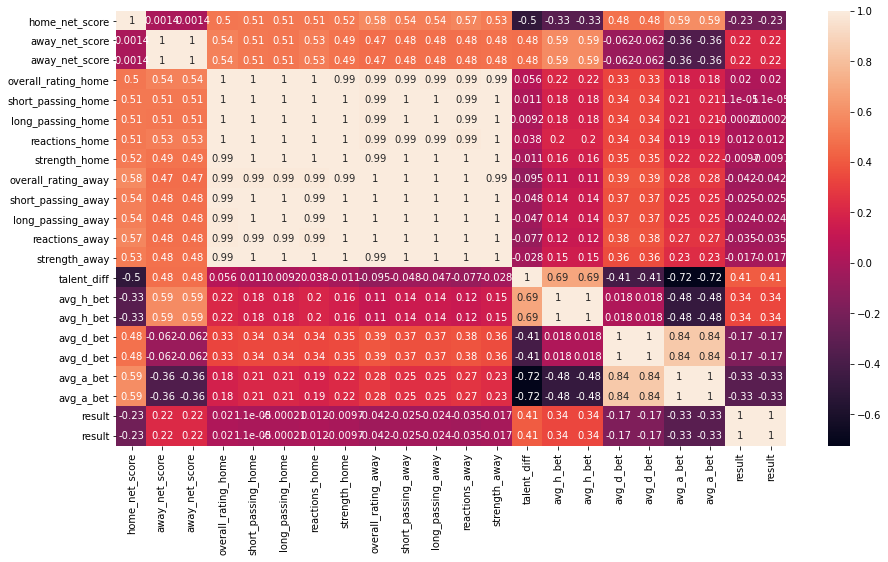

In [57]:
corr = match_talent.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [58]:
match_talent = match_talent.drop(columns = ['overall_rating_home', 'short_passing_home', 'long_passing_home',
       'reactions_home', 'strength_home', 'overall_rating_away',
       'short_passing_away', 'long_passing_away', 'reactions_away',
       'strength_away'])

### Models

In [59]:
def gaussianNB(train_x, train_y, test_x, test_y):
    gaussianNB = GaussianNB().fit(train_x, train_y)
    predict = gaussianNB.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [60]:
def random_forest(train_x, train_y, test_x, test_y):
    random_forest =  RandomForestClassifier(max_depth=5).fit(train_x, train_y)
    predict = random_forest.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [61]:
def logistic_regression(train_x, train_y, test_x, test_y):
    logit =  LogisticRegression().fit(train_x, train_y)
    predict = logit.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [62]:
def neural_network(train_x, train_y, test_x, test_y):
    nn =  MLPClassifier(hidden_layer_sizes=[30, 50, 10]).fit(train_x, train_y)
    predict = nn.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [63]:
def gb(train_x, train_y, test_x, test_y):
    gbt =  GradientBoostingClassifier().fit(train_x, train_y)
    predict = gbt.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

### Modeling with Bets Data

In [75]:
match_talent = match_talent.loc[:,~match_talent.columns.duplicated()]

In [77]:
feature, target = match_talent.iloc[:, :-1], match_talent.iloc[:, -1]

In [78]:
import warnings
warnings.filterwarnings('ignore')

testing on 0 rounds is done.
testing on 1 rounds is done.
testing on 2 rounds is done.
testing on 3 rounds is done.
testing on 4 rounds is done.
testing on 5 rounds is done.
testing on 6 rounds is done.
testing on 7 rounds is done.
testing on 8 rounds is done.
testing on 9 rounds is done.
average score for random forest on data is  0.5342980451891344
average score for gradient_boosting on data is  0.5332063975628332
average score for Gaussian Naive Bayes on data is  0.4662604722010662
average score for logistic regression on data is  0.5332825590251333
average score for neural network on data is  0.5284082254379284


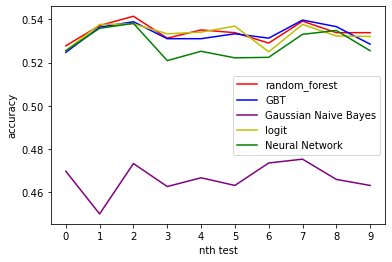

In [80]:
random_forests = []
gradient_boostings = []
GaussianNBs = []
MLPs = []
logistics = []
rf_sum = 0
gbt_sum = 0
gNB_sum = 0
logit_sum = 0
nn_sum = 0
n_test = 10
for i in range(n_test):
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.2, shuffle=True)
    rf_score = random_forest(train_x, train_y, test_x, test_y)
    gbt_score = gb(train_x, train_y, test_x, test_y)
    gnb_score = gaussianNB(train_x, train_y, test_x, test_y)
    logit_score = logistic_regression(train_x, train_y, test_x, test_y)
    nn_score = neural_network(train_x, train_y, test_x, test_y)
    random_forests.append(rf_score)
    rf_sum += rf_score
    gradient_boostings.append(gbt_score)
    gbt_sum += gbt_score
    GaussianNBs.append(gnb_score)
    gNB_sum += gnb_score
    logistics.append(logit_score)
    logit_sum += logit_score
    MLPs.append(nn_score)
    nn_sum += nn_score
    print("testing on " + str(i) + " rounds is done.")
print("average score for random forest on data is ", rf_sum / n_test)
print("average score for gradient_boosting on data is ", gbt_sum / n_test)
print("average score for Gaussian Naive Bayes on data is ", gNB_sum / n_test)
print("average score for logistic regression on data is ", logit_sum / n_test)
print('average score for neural network on data is ', nn_sum / n_test)
fig, ax = plt.subplots()
x = np.arange(n_test)
plt.plot(x, np.array(random_forests), color="r", label="random_forest")
plt.plot(x, np.array(gradient_boostings), color="b", label="GBT")
plt.plot(x, np.array(GaussianNBs), color="purple", label="Gaussian Naive Bayes")
plt.plot(x, np.array(logistics), color="y", label="logit")
plt.plot(x, np.array(MLPs), color='g', label='Neural Network')
plt.xlabel("nth test")
plt.xticks(np.arange(0, n_test, step=1))
plt.ylabel("accuracy")
plt.legend()
plt.show()
fig.savefig("methods_select_talent_with_bet.png")

### Modeling without Bets Data

In [74]:
train_x.iloc[:, :-3]

,home_net_score,away_net_score,away_net_score,talent_diff,avg_h_bet,avg_h_bet,avg_d_bet
8175,-1,-3,-3,-0.050468,2.050000,2.050000,2.930000
9163,-7,-15,-15,0.093021,3.161111,3.161111,3.394444
8750,29,-4,-4,-0.037913,1.275556,1.275556,5.055556
19473,20,-19,-19,-0.129864,1.141429,1.141429,7.792857
13327,-5,-7,-7,-0.006478,2.277143,2.277143,3.151429
...,...,...,...,...,...,...,...
18802,1,31,31,0.099039,4.142857,4.142857,3.704286
11930,-23,-13,-13,0.032726,1.880000,1.880000,3.722000
4112,-1,-1,-1,0.019285,1.859000,1.859000,3.526000
6867,3,-24,-24,-0.071175,1.494444,1.494444,3.800000


testing on 0 rounds is done.
testing on 1 rounds is done.
testing on 2 rounds is done.
testing on 3 rounds is done.
testing on 4 rounds is done.
testing on 5 rounds is done.
testing on 6 rounds is done.
testing on 7 rounds is done.
testing on 8 rounds is done.
testing on 9 rounds is done.
average score for random forest on data is  0.5368621477532368
average score for gradient_boosting on data is  0.5352373698908353
average score for Gaussian Naive Bayes on data is  0.46717440974866714
average score for logistic regression on data is  0.5307946179233308
average score for neural network on data is  0.5154861640010154


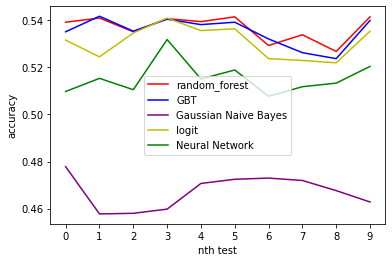

In [ ]:
random_forests = []
gradient_boostings = []
GaussianNBs = []
MLPs = []
logistics = []
rf_sum = 0
gbt_sum = 0
gNB_sum = 0
logit_sum = 0
nn_sum = 0
n_test = 10
for i in range(n_test):
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.2, shuffle=True)
    rf_score = random_forest(train_x.iloc[:, :-3], train_y, test_x.iloc[:, :-3], test_y)
    gbt_score = gb(train_x.iloc[:, :-3], train_y, test_x.iloc[:, :-3], test_y)
    gnb_score = gaussianNB(train_x.iloc[:, :-3], train_y, test_x.iloc[:, :-3], test_y)
    logit_score = logistic_regression(train_x.iloc[:, :-3], train_y, test_x.iloc[:, :-3], test_y)
    nn_score = neural_network(train_x.iloc[:, :-3], train_y, test_x.iloc[:, :-3], test_y)
    random_forests.append(rf_score)
    rf_sum += rf_score
    gradient_boostings.append(gbt_score)
    gbt_sum += gbt_score
    GaussianNBs.append(gnb_score)
    gNB_sum += gnb_score
    logistics.append(logit_score)
    logit_sum += logit_score
    MLPs.append(nn_score)
    nn_sum += nn_score
    print("testing on " + str(i) + " rounds is done.")
print("average score for random forest on data is ", rf_sum / n_test)
print("average score for gradient_boosting on data is ", gbt_sum / n_test)
print("average score for Gaussian Naive Bayes on data is ", gNB_sum / n_test)
print("average score for logistic regression on data is ", logit_sum / n_test)
print('average score for neural network on data is ', nn_sum / n_test)
fig, ax = plt.subplots()
x = np.arange(n_test)
plt.plot(x, np.array(random_forests), color="r", label="random_forest")
plt.plot(x, np.array(gradient_boostings), color="b", label="GBT")
plt.plot(x, np.array(GaussianNBs), color="purple", label="Gaussian Naive Bayes")
plt.plot(x, np.array(logistics), color="y", label="logit")
plt.plot(x, np.array(MLPs), color='g', label='Neural Network')
plt.xlabel("nth test")
plt.xticks(np.arange(0, n_test, step=1))
plt.ylabel("accuracy")
plt.legend()
plt.show()
fig.savefig("methods_select_talent_without_bet.png")

In [ ]:
match_talent.to_csv("match_talent.csv")